### $\large{\color {red} {\text{Notes for the reader of this JupyterLab notebook}}}$  
This notebook in intended to be rendered into a PDF document by Quarto. The notebook contains formatting tags, Quarto markdown code and sections within HTML comment tags that are excluded from the PDF document. Quarto does a good job of rendering the Jupyter Notebook into a final document. The output is not exactly publication ready, but good enough to share. The organization of this report will loosely follow parts of the IMRaD and IEEE style guidelines.

Some of the narration in this report was generated by Google's NotebookLM and Gemini, then modified by me. Since this paper is not being submitted as homework or for publication in a journal, I feel the use of AI is acceptable for my personal writing projects.

The "out of the box" abilities of Quarto to generate publication ready reports is somewhat limited. I have not made any attempt to add any YAML or LaTex code to this notebook to generate journal type formatting. There are some online posts which offer guidelines on how to do this, but for this effort, only the basic features of Quarto are being used. For example, section headings, column widths, fonts, equation numbering etc. use the basic Quarto PDF format. Reference numbering is not working with the basic setup.

### $\large{\color {red} {\text{Notes for the author}}}$  

additional work to do

- include automatic reference numbering and equation numbering

### Misc references

[Analysis of the Buchla 295 10 Channel Comb Filter -- a Weird Twin-T Topology (free paper)](https://www.youtube.com/watch?v=6DCNOUWSGxc)  
[A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer](https://arxiv.org/abs/2411.11358)  
https://github.com/lantertronics/buchla-plots  
https://buchla.com/history/  
https://en.wikipedia.org/wiki/Buchla_Electronic_Musical_Instruments  
https://www.ieee.org/  

### Formatting references

https://quarto.org/docs/journals/formats  
https://github.com/quarto-journals/elsevier  
https://github.com/quarto-journals  
https://github.com/quarto-journals/article-format-template  
https://biostats-r.github.io/biostats/quarto/  
https://www.usgs.gov/publications/a-reproducible-manuscript-workflow-a-quarto-template  
https://github.com/dfolio/quarto-ieee/  

https://gael-close.github.io/posts/2209-formatting-ieeetran/2209-formatting-ieeetran.html  
https://cameronpatrick.com/post/2023/07/quarto-thesis-formatting/  

### ToDo

- clean up narrative
- check and update fig captions
- check and fix references
- archive draft version and remove old parts
- spell and grammar check

### Versions

- 6-Mar-2025: Added v0 to filenames. Last save before trimming old code. This version is saved as Twin-T_Active_Bandpass_Filter_v0_6-Mar-2025.ipynb.tar.gz and can be accessed to get old code, test code and draft comments. Version rolled to v1 and old code and text removed.
- 7-Mar-2025: re-organizing parts of the report under the IMRD section headings, saved as v1a

***Abstract***: This report is an analysis of a band pass filter using Symbolic Modified Nodal Analysis implemented with Python in a JupyterLab Notebook then rendered into a PDF. The report relies on the work, *A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer*, by Aaron D. Lanterman. The report continues with related analysis, thoughts and observations about the filter topology. The use of Python makes generating the node equations and obtaining analytic solutions for the node voltages almost effortlessness.

![Schematic for Bandpass Twin-T Active Filter with components for the 1000 Hz band pass filter.](Bandpass_Twin-T_Active_Filter.png){width=600}

<!--
# INTRODUCTION - Make a case for your research
The Introduction typically provides everything your reader needs to know in order to understand the scope and purpose of your research. This section should provide:  

- Context for your research (for example, the nature and scope of your topic)  
- A summary of how relevant scholars have approached your research topic to date, and a description of how your research makes a contribution to the scholarly conversation  
- An argument or hypothesis that relates to the scholarly conversation  
- A brief explanation of your methodological approach and a justification for this approach (in other words, a brief discussion of how you gather your data and why this is an appropriate choice for your contribution)  
- The main conclusions of your paper (or the “so what”)  
- A roadmap, or a brief description of how the rest of your paper proceeds  
-->

# INTRODUCTION
This report walks through some of the analysis found in [1], which, describes a third order bandpass filter (BPF) employed in the Buchla Model 295 10 Channel Comb Filter, a synthesizer module developed as part of the Buchla 200 Electric Music Box. The BPF described has a unique arrangement of elements not found in the typical Twin-T configuration, which makes this BPF a interesting candidate to study. I sometimes watch YouTube videos made by [Lantertronics - Aaron Lanterman](https://www.youtube.com/@Lantertronics), the author of [1]. His video, [Analysis of the Buchla 295 10 Channel Comb Filter - a Weird Twin-T Topology](https://www.youtube.com/watch?v=6DCNOUWSGxc&t=3s), describes this filter and some of its characteristics. 

A procedure implemented in the [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) programming language called [modified nodal analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis) (MNA) [2] is used to generate the network equations used in this analysis. The MNA procedure provides an algorithmic method for generating a system of independent equations for linear circuit analysis. Once the schematic is drawn and the net list is generated, the network equations and solutions for the node voltages are easily obtained as shown in this report. The code in the JupyterLab notebook can be used as a template to analyze almost any linear circuit. The schematic for the filter, Figure 1, was drawn using [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) and the netlist was exported for the analysis.

This report was written using a [JupyterLab](https://jupyter.org/) notebook and rendered to a PDF document using [Quarto](https://quarto.org/) which is an open-source scientific and technical publishing system. The JupyterLab notebook which is the "source code" for this paper is available linked [here](https://github.com/Tiburonboy/EE_jupyter_notebooks/tree/main/Buchla%20Twin-T%20Active%20Filter) and related material is linked [here](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis).

My motivation for writing this report is: a) my own educational purposes, b) to explore the ability of Python to solve circuit analysis problems, and c) to test and document the procedure for rendering a JupyterLab notebook into a PDF document.

## Buchla History
Buchla Electronic Musical Instruments (BEMI) was founded by Don Buchla in 1963 under the name Buchla & Associates. The company manufactured synthesizers and MIDI controllers. Buchla's modular synthesizers, like the Buchla 100 and 200 series, were innovative in their design and sound creation approach, differing from Moog synthesizers by employing complex oscillators and waveshaping. 

## Related Work
The Python code employed in this report is somewhat unique since Python is open source, free and runs on a variety of platforms. The Python MNA code is made available under a public domain license and archived in a GitHub repository linked above.

There are other symbolic circuit analysis codes available and some of these are described here. Some of these codes are based on commercial software such as MATLAB, [TINA](https://www.tina.com/) and [Maple](https://www.maplesoft.com/).

[SLiCAP](https://analog-electronics.tudelft.nl/SLiCAP.html) is a symbolic linear analysis tool. SLiCAP is now a Python program, but originally it was written in MATLAB.

TINA is an acronym of Toolkit for Interactive Network Analysis. The TINA design suite is a circuit simulator and PCB design software package for analyzing, designing, and real time testing of analog, digital, HDL, MCU, and mixed electronic circuits and their PCB layouts. TINA has some [symbolic analysis capability](https://www.tina.com/symbolic-analysis).

Maple is a mathematical package and there is an application [note](https://www.maplesoft.com/applications/view.aspx?SID=1427) available describing its use in symbolic circuit analysis. The application note presents a method for evaluating, solving and designing a common, but not so simple pulse-mode high-gain transimpedance amplifier or TIA circuit.

[Symbolic Circuit Analysis](https://rodanski.net/ben/work/symbolic/index.htm) is a web page devoted to symbolic circuit analysis.

[SAPWIN](http://www.ewh.ieee.org/soc/es/May2001/12/Begin.htm) is a windows program package for symbolic and numerical simulation of analog circuits.

[Lcapy](https://github.com/mph-/lcapy) is an experimental Python package for teaching linear circuit analysis. It uses SymPy for symbolic mathematics. In [3] there is an overview of Lcapy as well as a survey of symbolic circuit analysis packages.

## Circuit Description
The schematic for the 1000 Hz section of the comb filter is shown in Figure 1. The schematic was drawn using LTSpice and the netlist was exported for this analysis. The schematic has component values for the 1000 Hz section of the comb filter. The input node is labeled node 1 and the output of the Op Amp is labeled node 2. The other nodes are sequentially labeled from 3 to 5. The filter circuit has three resisters, three capacitors and one Op Amp. The component values shown in the schematic, Figure 1, where chosen from [1, Table I], which is the 1000 Hz filter. In [4], the Op Amp is listed as N5556V, which was an operational amplifier manufactured by Signetics. 

The Op Amp used in the analysis is an ideal Op Amp, which is defined in the Python MNA code as a circuit element of type ```O``` in the circuit netlist. The ideal Op Amp is a theoretical concept, used to simplify the analysis of of circuits which contain one or more operational amplifiers and is a type of circuit element supported by the MNA code. The ideal Op Amp as modeled in the MNA code assums that there is a DC negative feedback path in the circuit. No current flows into the input terminals of the Op Amp and the output impedance of the Op Amp is zero.

The Twin-T filter topology is made up of two "T" shaped networks connected together, which is why it's called "Twin-T". The arrangement of the resistors and capacitors in Figure 1 is a bit different than the more common notch (band stop) Twin-T filter which shows up in on-line when you search for "Twin-T". The filter has three capacitors which suggests that the circuit has a third order characteristic polynomial. 

For the analysis that follows, the filter circuit is assumed to be a [linear time-invariant](https://en.wikipedia.org/wiki/Linear_time-invariant_system) (LTI) system. LTI systems have two key properties, First, the circuit obeys the [superposition principle](https://en.wikipedia.org/wiki/Superposition_principle) and second the circuit doesnt change over time, in other words, a time-shifted input results in a time-shifted output.

<!--
# METHODS - What did you do?
The Methods section describes exactly what you did to gather the data that you use in your paper. This should expand on the brief methodology discussion in the introduction and provide readers with enough detail to, if necessary, reproduce your experiment, design, or method for obtaining data; it should also help readers to anticipate your results. The more specific, the better!  These details might include:

- An overview of the methodology at the beginning of the section  
- A chronological description of what you did in the order you did it  
- Descriptions of the materials used, the time taken, and the precise step-by-step process you followed  
- An explanation of software used for statistical calculations (if necessary)  
- Justifications for any choices or decisions made when designing your methods  
-->

# METHODS
The analysis of the circuit in Figure 1 uses both symbolic and numerical mathematics to solve a system of equations to obtain solutions of the node voltages. The circuit analysis relies on using [Laplace transformed](https://en.wikipedia.org/wiki/Laplace_transform) circuit elements, specifically, the capacitor values in Figure 1 are replace by $\frac {1}{sC_n}$, where $s$ is the Laplace variable and $C_n$ are the capacitor values. This means that the analysis is performed in the frequency domain where linear algebra and matrix inversions are used to solve for the unknown voltages and currents. This method avoids having to deal with differential equations. The circuit analysis is performed using a JupyterLab notebook running Python code. 

[LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) was used to draw the schematic of the filter and generate the netlist. This helps to ensure that the netlist is correct, which is helpful for circuits with a complicated topology or larger number of components. The net list for Figure 1 could have been easily generated by hand, but since the schematic needed to be drawn out to include as a figure in this report, it is natural to just use LTSpice to generate the net list. The component values in the netlist were manually edited to used scientific notation and the Op Amp entry was fixed. Later in this reoprt the solutions obtrained from LTSpice are compared to the soultions from the Python code.

The analysis begins with generating the newtork equations from the circuit's netlist by calling:

> ```report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)```

The function ```SymMNA.smna()``` is described in [5, chapter 4]. The [SymPy](https://www.sympy.org/) function ```solve``` is capable of working through the algebra to solve the system of equations and can even find the roots of the numerator and denominator polynomials in some cases. Analytic expressions are easily generated for the filter's node voltages and the voltage transfer function.

The analysis continues with a reduced complexity version of the filter, as described in [1], followed by numerical solutions and various graphs and tables. Then three filter design examples are presented. The report ends with Results and Discussion sections.

This report was getting rather long, so related analysis topics were moved to separate JupyterLab notebooks. Links to three related JupyterLab notebooks are provided. The first link is to an interesting alternate circuit analysis technique call design orientated analysis [6]. The second link is to a JupyterLab notebook that covers a sensitivity analysis of the filter. The third link looks at lowpass, highpass and band reject variations of the filter.

This report is directly rendered from a JupyterLab notebook and many of the code cells with output are displayed. The code cells are highlighted in gray and most of the code outputs are displayed by converting the equations to LaTex and then to markdown to make the fonts used by the PDF rendering engine consistent. 

Since this report is about circuit analysis and Python codeing, I felt that including the Python code in the PDF would illustrate this link. Some of the code cells have been suppressed in the PDF output by placing the mark down command, ```#| echo: false```, in the first line of the code cell. This was done to improve readability since some of the code repeats. The ```ipynb``` notebook file in the GitHub repository can be examined to view all the notebook cells, even those hidden by using HTML comment tags.

Key techniques used in the analysis are described in the following sections:

## Frequency Response Plot

A [frequency response](https://en.wikipedia.org/wiki/Frequency_response) plot is a graphical representation of how a system responds to different input frequencies. It's a valuable tool in various fields, including engineering, audio, and signal processing. Typically, a frequency response plot shows two key characteristics of a system:

1. Magnitude Response: This indicates how much the system amplifies or attenuates different frequencies. It's often plotted in decibels (dB) on a logarithmic scale.
2. Phase Response: This shows the phase shift introduced by the system at different frequencies. It's usually plotted in degrees or radians.

By analyzing a frequency response plot, you can determine:

- Bandwidth: The range of frequencies a system can process effectively.
- Gain: The amount of amplification or attenuation at specific frequencies.
- Phase shift: The delay introduced by the system at different frequencies.
- Resonance: Peaks in the magnitude response indicating frequencies where the system amplifies strongly.
- Stability: Whether a system is stable or unstable based on the phase margin.

## The Complex Frequency Plane
The [complex frequency](https://en.wikipedia.org/wiki/Complex_plane) plane is a two-dimensional space where complex numbers represent frequency. Unlike the real-world concept of frequency, which is a scalar value representing the rate of oscillation, complex frequency adds a dimension of complexity. It's represented by the symbol $s$ and is defined as:

$s=\sigma+j\omega$

Where:

- $\sigma$ is the real part, representing exponential growth or decay.
- $j$ is the imaginary unit $\sqrt{-1}$.
- $\omega$ is the imaginary part, representing the angular frequency (related to the frequency in Hertz).

The complex frequency plane is divided into four quadrants:

- Right half-plane (RHP): $\sigma > 0$, representing exponentially growing signals.
- Left half-plane (LHP): $\sigma < 0$, representing exponentially decaying signals.
- Imaginary axis: $\sigma = 0$, representing sinusoidal signals with constant amplitude.

By plotting poles and zeros of a system on this plane, you can gain insights into its behavior, stability, and frequency response.

## Pole-Zero Diagram

A [pole–zero plot](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot) is a graphical representation of a system's transfer function in the complex plane. It provides valuable insights into the system's behavior, stability, and frequency response. The diagram is plotted on the complex plane, with the real part on the horizontal axis ($\sigma$) and the imaginary part on the vertical axis ($j\omega$).

- Poles: These are the values of the complex variable 's' that make the transfer function infinite. They are represented by 'x' on the diagram.
- Zeros: These are the values of 's' that make the transfer function zero. They are represented by 'o' on the diagram.

The relative count of zeros and poles in a transfer function significantly impacts the shape of the frequency response.

- Poles:
  - Each pole introduces a downward slope of -20 dB/decade. Multiple poles at the same frequency amplify this effect.
  - Each pole contributes a phase shift of -90 degrees. Multiple poles at the same frequency amplify this effect.  
- Zeros:
  - Each zero introduces an upward slope of +20 dB/decade. Multiple zeros at the same frequency amplify this effect.
  - Each zero contributes a phase shift of +90 degrees. Multiple zeros at the same frequency amplify this effect.
- Overall Slope:
  - If the number of zeros exceeds the number of poles, the magnitude plot will have a net upward slope.
  - If the number of poles exceeds the number of zeros, the magnitude plot will have a net downward slope.
  - A balanced number of zeros and poles can lead to a flat magnitude plot over certain frequency ranges.
- High-Frequency Asymptote:
  - The high-frequency asymptote of the magnitude plot is determined by the difference between the number of zeros and poles.
  - A larger number of zeros compared to poles will result in a steeper upward slope at high frequencies.
  - A larger number of poles compared to zeros will result in a steeper downward slope at high frequencies.
- Phase Shift:
  - The total phase shift at any frequency is the sum of the phase shifts contributed by each pole and zero.
  - A larger number of zeros compared to poles will result in a larger positive phase shift.
  - A larger number of poles compared to zeros will result in a larger negative phase shift.

The location of poles and zeros on the complex plane provides information about:

- Stability: If all poles are in the left half of the plane (LHP), the system is stable. If any pole is in the right half of the plane (RHP), the system is unstable.
- Frequency response: The distance of poles and zeros from the imaginary axis affects the system's gain and phase response at different frequencies.
- Time-domain behavior: The location of poles and zeros can influence the system's transient response and steady-state behavior.

## Impulse Response
The [impulse response](https://en.wikipedia.org/wiki/Impulse_response) of a system is its output when presented with a brief input signal called an impulse. An impulse is an idealized signal that has infinite amplitude and infinitely short duration, but with a total area of one. The impulse response can be obtained from the transfer function by using the SciPy function [impulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html). 

However, for the analysis of Figure 1, I did't find the impulse response of the transfer function to be that informative. Using SciPy, the impulse response is easy to calculate and plot, but I couldn't relate the shape of the impulse response back to the circuit in intuitive way. Additionally, using the impulse response along with the convolution function did not produce correct results since the [SciPy convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) and [Numpy convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) functions seem to treat the signal and circuit as a descrete time system. For this reason, the impulse of the transfer functions are not included in the analysis.

## Step Response
The [step response](https://en.wikipedia.org/wiki/Step_response) of a system is its output when the input is a sudden change from zero to a constant value. This constant value is often referred to as a "step" input. The system's behavior as it transitions from its initial state to a new steady-state condition is captured by the step response.

Several parameters are used to characterize a step response:

- Rise time: The time it takes for the output to go from 10% to 90% of its final value.
- Overshoot: The maximum amount by which the output exceeds the final value.
- Settling time: The time it takes for the output to settle within a specified percentage (e.g., 1%) of the final value.
- Steady-state error: The difference between the final value of the output and the desired output.

The step response provides valuable insights into a system's behavior:

- Stability: A stable system will eventually reach a steady-state value.
- Speed of response: The rise time indicates how quickly the system reacts to changes.
- Damping: Overshoot and settling time reveal information about the system's damping characteristics.

The step response is calculated by using the SciPy function [lsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html), which can be used to simulate output of a LTI system. The function, ```lsim()```, allows us to evaluate the performance characteristics of the circuit with a square wave or arbitrary input signal. SciPy has [step](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html) function in the library, but in this report, several cycles of a squarewave are used to examine the step response.

## Group Delay

[Group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#) is a measure of the time delay experienced by a group of frequencies as they pass through a system. It's essentially the rate of change of the phase response with respect to frequency. Group Delay is important for the following reasons: 

- Signal distortion: Variations in group delay across different frequencies can cause signal distortion, affecting the quality of audio, video, and data transmission.
- System design: Understanding group delay is crucial for designing systems with linear phase characteristics, which minimize distortion.
- Pulse propagation: In fields like optics and telecommunications, group delay affects the shape and timing of pulses.

Group delay, $\tau_g$, is calculated as the negative derivative of the phase response, $\phi$, with respect to angular frequency, $\omega$:

$\tau _{g}(\omega )=-\frac  {d\phi (\omega)}{d\omega}$

A system with a constant group delay is called a linear phase system. These systems introduce a pure time delay to all frequency components without altering their relative phase relationships, preserving the original waveform shape. According to [Audibility of Group-Delay Equalization](https://acris.aalto.fi/ws/portalfiles/portal/66449704/Audibility_of_Group_Delay_Equalization.pdf), the threshold is 2 ms. The abstract for the paper states: 

> The audibility thresholds for group-delay variation from several previous related studies are shown in Fig. 1. If not otherwise stated, these studies have been conducted using headphones. Green applied Huffman sequences, or truncated impulse responses of second-order allpass filters, to study the audibility of phase distortion. He found a threshold value for the peak group delay of about 2 ms for center frequencies of 625 Hz, 1875 Hz, and 4062 Hz.

The group delay for Figure 1, was only plotted for one case since this results was not used in the evaluation of the filter.

## Reproducibility
The analysis is based on Python modules consisting of SymPy, NumPy, SciPy and Pandas. Code to automatically generate network equations from circuit netlist using Modified-Nodal-Analysis [2]. The function, ```SymMNA()```, is describe in [5, chapter 4]. 

The results presented in this report should be reproducible if the package versions listed in Table 1 are used.

| Package | version |
|:---|:---|
| [Python](https://www.python.org/) | 3.10.9 |
| [JupyterLab](https://jupyterlab.readthedocs.io/en/latest/) |3.5.3 |
| [IPython](https://ipython.org/) | 8.10.0 |
| [NumPy](https://numpy.org/) | 1.23.5 |
| [SymPy](https://www.sympy.org/) | 1.11.1 |
| [SciPy](https://scipy.org/) | 1.10.0 |
| [Pandas](https://pandas.pydata.org/) | 1.5.3 |
| [Matplotlib](https://matplotlib.org/) | 3.7.0 |
| [Tabulate](https://pypi.org/project/tabulate/) | 0.8.10  |
| [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) | 17.1.8 |
| [Quarto](https://quarto.org/) | 1.4.553 |
: Package or Library versions {tbl-colwidths="[20,20]"}

The JupyterLab notebook used to generate this report was run on a laptop with an Intel i3-8130U CPU @ 2.2 GHz, illustrating that a high performance machine is not required to perform the analysis described in this document.

The following Python modules are used in this notebook.

In [1]:
#| echo: true
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

<!--
# RESULTS - What did you find?
The Results section outlines the data gathered through the methods described above and explains what the data show. This usually involves a combination of tables and/or figures and prose. In other words, the results section gives your reader context for interpreting the data. The results section usually includes:  

- A presentation of the data obtained through the means described in the methods section in the form of tables and/or figures  
- Statements that summarize or explain what the data show  
- Highlights of the most important results  

Tables should be as succinct as possible, including only vital information (often summarized) and figures should be easy to interpret and be visually engaging. When adding your written explanation to accompany these visual aids, try to refer your readers to these in such a way that they provide an additional descriptive element, rather than simply telling people to look at them. This can be especially helpful for readers who find it hard to see patterns in data.
-->

# RESULTS
In this section the analysis methods described above are applied to the netlist of Figure 1. The Python code presented below can be used as a template to analyze almost any LTI circuit, where the circuit elements are those describe in [x, Chapter x].

## Symbolic Analysis
Symbolic analysis presented in this report employs the MNA technique to generate network equations from the filter's netlist with the circuit's elements are represented by symbols. SymPy is used to solve the system of equations in symbolic form to obtain analytic expressions for the filter's voltage transfer function. The symbolic expressions can in some cases provide a deeper understanding of how each component contributes to the circuit's operation that can complement numerical simulations.

### Circuit Netlist
The netlist generated by LTSpice from the schematic is shown below. Some edits were made to fix up the formatting of the component values and the Op Amp declaration. The nodes were labeled in the schematic, otherwise LTSpice will use default labels such as N001, N002 etc. and the ```SymMNA.smna``` function wants integer values for the node numbers and these need to be consecutively ordered with no gaps in the numbering.

```
    * Bandpass-Twin-T-Active-Filter.asc
    R1 3 1 15k
    R2 4 5 186k
    R3 2 5 15k
    C1 5 1 10n
    C2 4 3 910p
    C3 2 3 10n
    XU1 4 0 2 opamp Aol=100K GBW=10Meg
    V1 1 0 1 AC 1
    .lib opamp.sub
    .ac dec 1000 100 10k
    .backanno
    .end
```

Generation of the netlist from a schematic capture program is convenient and less error prone than generating the netlist by hand. A visual inspection of the schematic ensures that the circuit to be analyzed is correct and it follows that the netlist is also correct. This is especially true for larger, more complicated schematics. 

The cleaned up netlist was copied to the cell below. The triple quotes allow text strings to span multiple lines since the line breaks are preserved.

In [2]:
#| echo: true
example_net_list = '''
* Bandpass-Twin-T-Active-Filter.asc
R1 3 1 15e3
R2 4 5 186e3
R3 2 5 15e3
C1 5 1 10e-9
C2 4 3 910e-12
C3 2 3 10e-9
O1 4 0 2
V1 1 0 1
'''

### Generate Network Equations 
The function ```SymMNA.smna(example_net_list)``` implements the MNA method on the filter's netlist. Stamps which are templates for modifying the B, C and D matrices are used to facilitate the construction of the matrices. The stamps used in this implementation of the MNA follow the stamps of [6]. The function is divided in the following sections.  

- The preprocessor reads in the netlist text file and removes comments, extra spaces and blank lines. The first letter of the element type is capitalized to make subsequent parsing of the file easier. The number of lines are counted and the number of entries on each line are checked to make sure the count is consistent with the element type.
- The parser code loads the preprocessed netlist into a data frame.  A report is generated which consists of a count of the element types in the netlist.
- Matrix formulation: Each of the matrices and vectors are generated.
- Circuit equation generation: The circuit equations are generated in a ```for``` loop. Sympy automatically does some simplification according to its default settings. The Laplace variable $s$ is used when inductors and capacitors are included in the circuit.

There is a limited amount of error checking performed. The number of items on each line in the netlist is checked to make sure the count is correct depending on the element type. The node numbering needs to be consecutive with no skipped numbers, otherwise empty rows or columns will be included in the matrix. Unknown element types create an error.

The function takes one argument which is a text string that is the circuit’s netlist. The format of the netlist is very similar to the standard spice netlist and any of the required changes can be easily made with a text editor. The function returns six items.  

1. report - a text string, which is the netlist report.
2. df - a Pandas data frame, which the circuit’s net list info loaded into a data frame.
3. df2 - a Pandas data frame, which contains the branches with unknown currents.
4. $A$ - a SymPy matrix, which is $(m+n)$ by $(m+n)$, where $n$ is the number of nodes and $m$ is the number of current unknowns. $A$ is the combination of four smaller matrices, $G$, $B$, $C$, and $D$. These matrices are described in the GitHub repository.
5. $X$ - a list that holds the unknown node voltages and the currents through the independent voltage sources.
6. $Z$ - a list that holds the independent voltage and current sources

The netlist can be generated by hand or exported from a schematic capture program and pasted into the JupyterLab notebook. The following call is made to generate the NMA matrices and report.

In [3]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

The report lists some of the relevant statistics about the circuits netlist.

In [4]:
#| echo: true
print(report)

Net list report
number of lines in netlist: 8
number of branches: 7
number of nodes: 5
number of unknown currents: 2
number of RLC (passive components): 6
number of resistors: 3
number of capacitors: 3
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of Op Amps: 1
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



The retured parameter, $X$ and $Z$, which are of type ```list```, and are the unknown node voltages and currents as well as the independednt voltage and current sources need to be turned into SymPy matrices by the following code: 

In [5]:
#| echo: true
X = Matrix(X)
Z = Matrix(Z)

Use the SymPy function ```Eq``` to formulate the network equations.

In [6]:
#| echo: true
NE_sym = Eq(A*X,Z)

The equations, ```NE_sym```, define the mathematical relationship between voltages and currents in the filter circuit in terms of node voltages, $v_1$, $v_2$ etc., components $R_1$, $C_1$ etc., the Laplace variable $s$ and the independent voltage source $V_1$. The equations are shown below:

In [7]:
#| echo: true

# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.lhs[i]),
        latex(NE_sym.rhs[i]))

Markdown(temp)

<p>$- C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}} = 0$</p><p>$- C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$</p><p>$- C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$</p><p>$- C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$</p><p>$- C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}} = 0$</p><p>$v_{1} = V_{1}$</p><p>$v_{4} = 0$</p>

The two lines of Python code below turn the free symbols from the ```NE_sym``` equations into SymPy variables and the element values contained in the netlist are put into a Python dictionary data structure to be used in the numerical solutions later in this report.

In [8]:
#| echo: true
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

### Solve the Network Equations
The SymPy function ```solve``` is used to obtain the node voltages and independent voltage source currents.

In [9]:
#| echo: true
U_sym = solve(NE_sym,X)

The solution to the network equations are the node voltages expressed in terms of the Laplace variable $s$ are displayed below.

In [10]:
#| echo: true
temp = ''
for i in U_sym.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} R_{3} V_{1} s - C_{2} R_{2} V_{1} s - C_{2} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{3} = \frac{- C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} - C_{2} R_{2} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p>

### Voltage Transfer Function
The voltage transfer function,

$H(s)=\frac {v_2(s)}{v_1(s)}$

for the filter  is generated and displayed by the following code:

In [11]:
#| echo: true
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1}$

This expression agrees with [1 eq. (1)]. The numerator is a second order polynomial and the denominator is third order polynomial in terms of $s$. Generally, the order of the dominator is equal to the number of reactive elements in the circuit. The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [12]:
#| echo: true
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynomial
The numerator polynomial is:

In [13]:
#| echo: true
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)$

The coefficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [14]:
#| echo: true
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$\
    </p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}$</p><p>$b_1=- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}$    </p><p>$b_0=0$</p>

Notice that ther terms $b_2$ and $b_1$ are negative. This follows from the Op Amp being configured as an inverting amplifier. R2 and R3 provide a DC path from the Op Amp's output to the inverting terminal.

The roots of the numerator polynomial can easily be found with SymPy. 

This filter has two transmission zeros

In [15]:
#| echo: true
num_root_sym = solve(H_sym_num,s)

There are two solutions, $z_1=0$ and the other root is: 

In [16]:
#| echo: true
Markdown('$z_2={:s}$'.format(latex(num_root_sym[1])))

$z_2=\frac{- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}}{C_{1} R_{3} \left(C_{2} R_{1} + C_{2} R_{2} + C_{3} R_{1}\right)}$

### Denominator Polynomial
The denominator polynomial of the transfer function is called the characteristic polynomial. The roots of the denominator, also called poles of the system,  determine the system's stability. If any of these roots have a positive real part, the system is unstable, meaning its output will grow unbounded. The roots also influence how the system responds to changes in input (the transient response). They affect things like how quickly the system settles to a new state, whether it oscillates, and the damping of those oscillations. Each root of the characteristic polynomial corresponds to a natural mode of the system.

The denominator polynomial is:

In [17]:
#| echo: false
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1$

The coefficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [18]:
#| echo: false
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

The roots of the denominator polynomial can found with SymPy. The filter circuit being analyzed in this report has a denominator polynomial that SymPy can quickly solve. This is not always the case. The expressions are long and do not render well when the JupyterLab notebook is converted to PDF, so the expressions were converted to LaTex strings and then to PNG images with [latex2png](https://latex2png.com/) for this report.

In [19]:
#| echo: true
denom_root_sym = solve(H_sym_denom,s)

The following code produces the LaTex strings for the equations for the roots. This section of the notebook is contained with HTML comment tags and is not included in the rendered PDF.
## Pole 0

Notes for generating images with GIMP

- edit LaTex strings to remove ```\\``` and replace with ```\```
- copy LaTex strings of each term to latex2png
- paste png to GIMP
  - expand canvas image\canvas size change to wider and taller, eg 18 inches width by 6 inches highth
- add new layer, with new name
- paste new equation, find center of image to move it to position Ctrl H to anchor image
- add new layer, with new name
- paste new equation, find center of image to move it to position Ctrl H to anchor image
- crop image and save as png

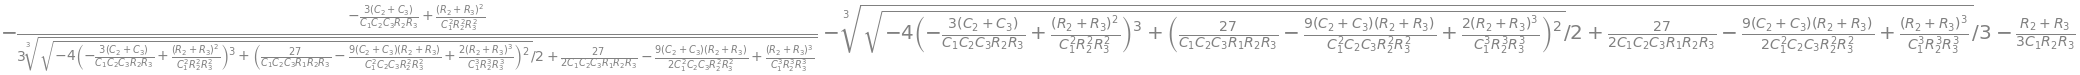

In [20]:
denom_root_sym[0]

Needed to replace ```\\``` with ```\``` , copy text string to latex2png to convert to image.

In [21]:
latex(denom_root_sym[0])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_

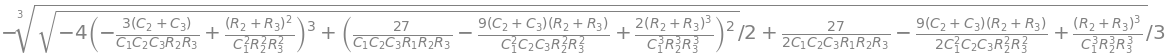

In [22]:
denom_root_sym[0].args[0]

In [23]:
latex(denom_root_sym[0].args[0])

'- \\frac{\\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

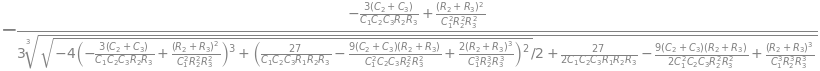

In [24]:
denom_root_sym[0].args[1]

In [25]:
latex(denom_root_sym[0].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

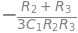

In [26]:
denom_root_sym[0].args[2]

In [27]:
latex(denom_root_sym[0].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

## Pole 1

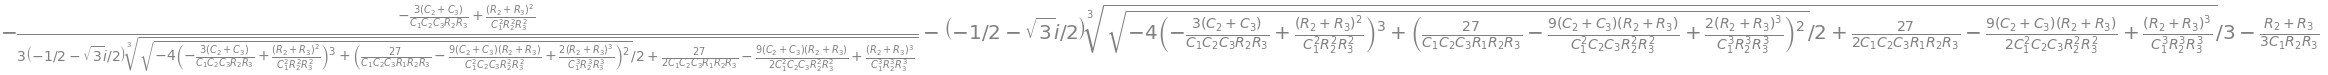

In [28]:
denom_root_sym[1]

In [29]:
latex(denom_root_sym[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt

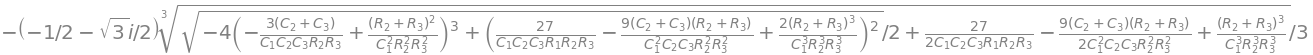

In [30]:
denom_root_sym[1].args[0]

In [31]:
latex(denom_root_sym[1].args[0])

'- \\frac{\\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

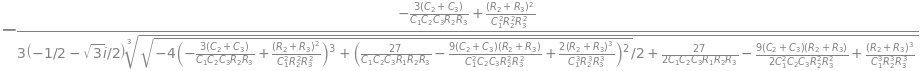

In [32]:
denom_root_sym[1].args[1]

In [33]:
latex(denom_root_sym[1].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

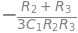

In [34]:
denom_root_sym[1].args[2]

In [35]:
latex(denom_root_sym[1].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

## Pole 2

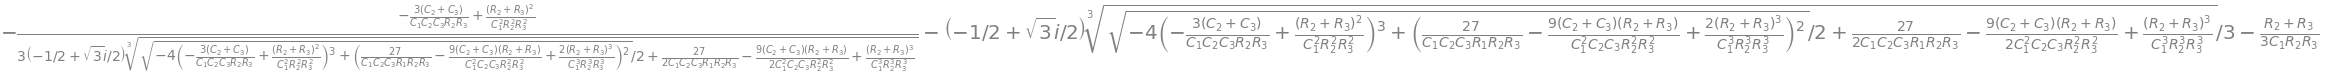

In [36]:
denom_root_sym[2]

In [37]:
latex(denom_root_sym[2])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt

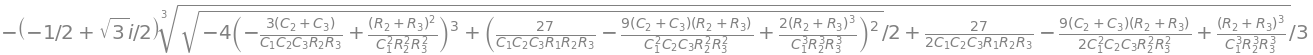

In [38]:
denom_root_sym[2].args[0]

In [39]:
latex(denom_root_sym[2].args[0])

'- \\frac{\\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

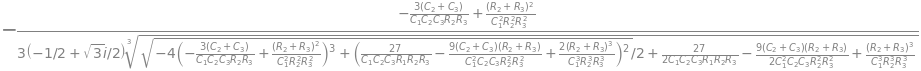

In [40]:
denom_root_sym[2].args[1]

In [41]:
latex(denom_root_sym[2].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

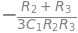

In [42]:
denom_root_sym[2].args[2]

In [43]:
latex(denom_root_sym[1].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

Alternatively, using: $a_3s^3+a_2s^2+a_1s+a_0$

In [44]:
a2, a1, a0 = symbols('a2 a1 a0')

s**3+a2*s**2+a1*s+a0

In [45]:
roots = solve(s**3+a2*s**2+a1*s+a0,s)

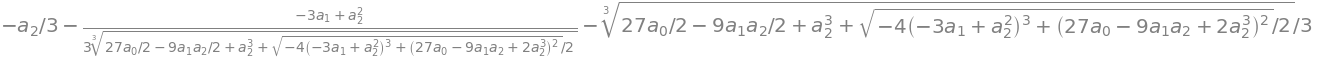

In [46]:
roots[0]

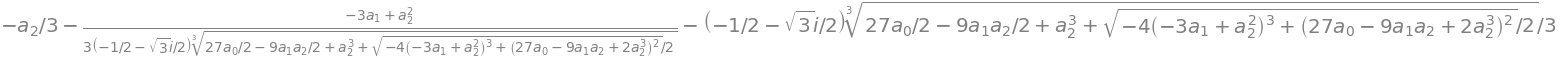

In [47]:
roots[1]

In [48]:
#| echo: false
Markdown('$p_1={:s}$'.format(latex(roots[1])))

$p_1=- \frac{a_{2}}{3} - \frac{- 3 a_{1} + a_{2}^{2}}{3 \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27 a_{0}}{2} - \frac{9 a_{1} a_{2}}{2} + a_{2}^{3} + \frac{\sqrt{- 4 \left(- 3 a_{1} + a_{2}^{2}\right)^{3} + \left(27 a_{0} - 9 a_{1} a_{2} + 2 a_{2}^{3}\right)^{2}}}{2}}} - \frac{\left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27 a_{0}}{2} - \frac{9 a_{1} a_{2}}{2} + a_{2}^{3} + \frac{\sqrt{- 4 \left(- 3 a_{1} + a_{2}^{2}\right)^{3} + \left(27 a_{0} - 9 a_{1} a_{2} + 2 a_{2}^{3}\right)^{2}}}{2}}}{3}$

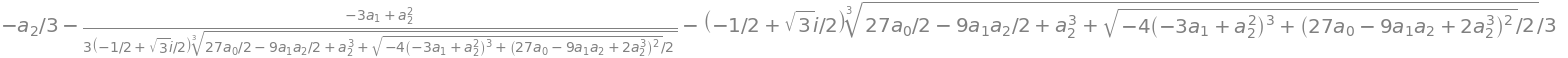

In [49]:
roots[2]

![Terms for the first pole.](pole0.png)

![Terms for the second pole.](pole1.png)

![Terms for the third pole.](pole2.png)

As is evident in the analytic expressions for the poles of the transfer function shown in the figures above, these expressions are not very intuitive or useful unless some simplification is performed. With the help of the Python code and SymPy, the procedure outlined above can be considered a "brute force" analysis, where analytic expressions can be easily obtained from a circuit's netlist with little effort. If the circuit is small, that is having only a few components or nodes, the symbolic expressions can be very useful.  

## Design Oriented Analysis
The analytic expressions for the transfer function and roots of the numerator and denominator polynomials are rather long and not very intuitive. There is an alternative approach to circuits analysis called, Design Oriented Analysis, proposed by R. D. Middlebrook [7] and also known under the name, Fast Analytical Circuits Techniques, by Vatché Vorpérian [8], which attempts to reduce algebraic complexity and provide physical insight into the circuit's behavior. See the link [here](https://github.com/Tiburonboy/EE_jupyter_notebooks/blob/main/Buchla%20Twin-T%20Active%20Filter/Twin-T_BPF_FACTS_v0.ipynb) for a JupyterLab notebook exploring these ideas. 

In this report there are a three related topics that are explored in seperate JupyterLab notebooks and are located in my GitHub repository. This report was getting rather long, so these analysices, which normally would be included as appendices in a tradition report or paper, are referenced with a hyperlink. 

## Reduced Complexity
As described in [1], the transfer function simplifies under the case of $R_1=R_3$ and $C_1=C_3$ to a second order characteristic polynomial. This simplification works because a zero cancels with a pole in the voltage transfer function. The numerator polynomial reduces to the following when the Laplace term, $s$, is collected and factored. 

In [50]:
#| echo: true
C, R = symbols('C R')
Markdown('$N_r(s)={:s}$'.format(latex(H_sym_num.subs({R1:R, R3:R, C1:C,
    C3:C}).collect(s).factor())))

$N_r(s)=- s \left(C R s + 1\right) \left(C R + C_{2} R + C_{2} R_{2}\right)$

In a similar fashion, the denominator polynomial is:

In [51]:
#| echo: true
Markdown('$D_r(s)={:s}$'.format(latex(H_sym_denom.subs({R1:R, R3:R, C1:C,
    C3:C}).collect(s).factor())))

$D_r(s)=\left(C R s + 1\right) \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)$

You can see the $\left(CRs+1\right)$ terms will cancel in the numerator and denominator.

$\frac {N_r(s)}{D_r(s)}=\frac {- s \left(C R s + 1\right) \left(C R + C_{2} R + C_{2} R_{2}\right)}{\left(C R s + 1\right) \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)}=\frac {- s \left(C R + C_{2} R + C_{2} R_{2}\right)}{ \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)}$

### Symbolic Analysis for $R1 = R3 = R$ and $C1 = C3 = C$
The following Python code makes the substitution, $R_1 = R_3 = R$ and $C_1 = C_3 = C$, into the network equations. 

In [52]:
#| echo: true
NE_sym_reduced_complexity = NE_sym.subs({R1:R,R3:R,C1:C,C3:C})

This produces the following network equations:

In [53]:
#| echo: false
# display the equations
temp = ''
for i in range(shape(NE_sym_reduced_complexity.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym_reduced_complexity.rhs[i]),latex(NE_sym_reduced_complexity.lhs[i]))
Markdown(temp)

<p>$0 = - C s v_{5} + I_{V1} + v_{1} \left(C s + \frac{1}{R}\right) - \frac{v_{3}}{R}$</p><p>$0 = - C s v_{3} + I_{O1} + v_{2} \left(C s + \frac{1}{R}\right) - \frac{v_{5}}{R}$</p><p>$0 = - C s v_{2} - C_{2} s v_{4} + v_{3} \left(C s + C_{2} s + \frac{1}{R}\right) - \frac{v_{1}}{R}$</p><p>$0 = - C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}}$</p><p>$0 = - C s v_{1} + v_{5} \left(C s + \frac{1}{R_{2}} + \frac{1}{R}\right) - \frac{v_{4}}{R_{2}} - \frac{v_{2}}{R}$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

The unknown node voltages and current from $V_1$ can be found by using the SymPy ```solve``` function. 

In [54]:
#| echo: false
U_sym_reduced_complexity = solve(NE_sym_reduced_complexity,X)

This produces the following expressions for the node voltages.

In [55]:
#| echo: false
temp = ''
for i in U_sym_reduced_complexity.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_complexity[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C R V_{1} s - C_{2} R V_{1} s - C_{2} R_{2} V_{1} s}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p><p>$v_{3} = \frac{- C R V_{1} s + V_{1}}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C C_{2} R R_{2} V_{1} s^{2} - C_{2} R_{2} V_{1} s}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p>

### Transfer Function
The voltage transfer function

$H(s)=\frac {v_2(s)}{v_1(s)}$

for the reduced complexity network is:

In [56]:
#| echo: false
H_sym_reduced_complexity = cancel(U_sym_reduced_complexity[v2]/U_sym_reduced_complexity[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym_reduced_complexity)))

$H(s)=\frac{s \left(- C R - C_{2} R - C_{2} R_{2}\right)}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$

The equation above is different than [1, eq (8)], which is missing the $s$ term in the numerator. 

#### Characteristic Polynomial
The characteristic polynominal for $R_1 = R_3 = R$ and $C_1 = C_3 = C$, is shown below.

In [57]:
#| echo: false
H_sym_reduced_complexity_num, H_sym_reduced_complexity_denom = fraction(H_sym_reduced_complexity,s) #returns numerator and denominator
Markdown('${:s}$'.format(latex(H_sym_reduced_complexity_denom)))

$C C_{2} R R_{2} s^{2} + C_{2} R s + 1$

The coefficients of the Laplace variable, s, can be represented by $a$, $b$, and $c$ in the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$

where:

In [58]:
#| echo: false
a = H_sym_reduced_complexity_denom.coeff(s**2)
b = H_sym_reduced_complexity_denom.coeff(s**1)
c = H_sym_reduced_complexity_denom - b*s*1 - a*s**2
Markdown('<p>$a={:s}$</p><p>\
    $b={:s}$</p><p>$c={:s}$</p>'.format(latex(a),latex(b),latex(c)))

<p>$a=C C_{2} R R_{2}$</p><p>    $b=C_{2} R$</p><p>$c=1$</p>

The poles of the transfer function are:

In [59]:
#| echo: false
H_sym_reduced_complexity_denom_roots = solve(H_sym_reduced_complexity_denom,s)

Markdown('${:s}$'.format(latex(H_sym_reduced_complexity_denom_roots)))

$\left[ \frac{- C_{2} R - \sqrt{C_{2} R \left(- 4 C R_{2} + C_{2} R\right)}}{2 C C_{2} R R_{2}}, \  \frac{- C_{2} R + \sqrt{C_{2} R \left(- 4 C R_{2} + C_{2} R\right)}}{2 C C_{2} R R_{2}}\right]$

The pole are complex if, $C_{2} R < 4 C R_{2}$.

### Natural Frequency, Q Factor and Damping Ratio
As described in [Q factor](https://en.wikipedia.org/w/index.php?title=Q_factor), a two pole filter has the following characteristic polynomial:

$s^2+\frac{\omega_n}{Q}s+\omega_n^2$

By equating the coefficients, $\omega_n$, Q Factor and Damping Ratio can be expressed in terms of $R_2$, $R$, $C_2$ and $C$.

In [60]:
#| echo: false
omega_n, Q_factor, damping_ratio, atten_param = symbols('omega_n Q_factor damping_ratio atten_param')

In [61]:
#| echo: false
omega_n = solve(omega_n**2 - c/a, omega_n)[1]
Markdown('$\omega_n = {:s}$'.format(latex(omega_n)))

$\omega_n = \sqrt{\frac{1}{C C_{2} R R_{2}}}$

In [62]:
#| echo: false
Q_factor = solve(omega_n/Q_factor - b/a, Q_factor)[0]
Markdown('$Q = {:s}$'.format(latex(Q_factor)))

$Q = C R_{2} \sqrt{\frac{1}{C C_{2} R R_{2}}}$

The expression for Q in [1, eq. (12)] is different than the SymPy derived expression for Q above. It seems that SymPy does not want to fully simplify extressions containing radicals. Rather than complicating the code in an attempt to get SymPy to reduce the expression for Q to its simplest form, we will just use it as is.

From [Q factor](https://en.wikipedia.org/w/index.php?title=Q_factor): 

$\frac{\omega_n}{Q} = 2 \zeta \omega_n = 2 \alpha$

Solving for the damping ratio, $\zeta$:

In [63]:
#| echo: false
damping_ratio = 1/(2*Q_factor)
Markdown('$\zeta = {:s}$'.format(latex(damping_ratio)))

$\zeta = \frac{1}{2 C R_{2} \sqrt{\frac{1}{C C_{2} R R_{2}}}}$

The attenuation parameter, $\alpha$, represents the rate of decay of the oscillations of the system. 

<!--
not sure why double \\ in \\alpha is needed ?
-->

In [64]:
#| echo: false
atten_param = omega_n/Q_factor/2
Markdown('$\\alpha={:s}$'.format(latex(atten_param)))

$\alpha=\frac{1}{2 C R_{2}}$

## Numerical Analysis
After substituting the element values from the netlist into the equations with the following code:

In [65]:
#| echo: false
def round_expr(expr, num_digits):
    '''
    from stackoverflow, used to display fewer digits
    https://stackoverflow.com/questions/48491577/printing-the-output-rounded-to-3-decimals-in-sympy
    '''
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [66]:
#| echo: true
equ_N = NE_sym.subs(element_values)

we get the following numerical equations:

In [67]:
#| echo: false
# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 1.0 \cdot 10^{-8} s v_{5} + v_{1} \cdot \left(1.0 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right) - 6.6667 \cdot 10^{-5} v_{3}$</p><p>$0 = I_{O1} - 1.0 \cdot 10^{-8} s v_{3} + v_{2} \cdot \left(1.0 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right) - 6.6667 \cdot 10^{-5} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{2} - 9.0 \cdot 10^{-10} s v_{4} - 6.6667 \cdot 10^{-5} v_{1} + v_{3} \cdot \left(1.1 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right)$</p><p>$0 = - 9.0 \cdot 10^{-10} s v_{3} + v_{4} \cdot \left(1.0 \cdot 10^{-9} s + 5.376 \cdot 10^{-6}\right) - 5.376 \cdot 10^{-6} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{1} - 6.6667 \cdot 10^{-5} v_{2} - 5.376 \cdot 10^{-6} v_{4} + v_{5} \cdot \left(1.0 \cdot 10^{-8} s + 7.2043 \cdot 10^{-5}\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = v_{4}$</p>

SymPy can solve for unknown node voltages, $I_{V1}$ and $I_{O1}$ in terms of Laplace variable s. The node voltages are:

In [68]:
#| echo: false
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{- 1.53414746543779 \cdot 10^{18} s^{2} - 1.02276497695853 \cdot 10^{22} s}{117000000000000.0 s^{3} + 8.42903225806452 \cdot 10^{17} s^{2} + 5.02764976958526 \cdot 10^{21} s + 3.07219662058372 \cdot 10^{25}}$</p><p>$v_{3} = \frac{1.53609831029186 \cdot 10^{24} - 3.45622119815668 \cdot 10^{16} s^{2}}{5850000000000.0 s^{3} + 4.21451612903226 \cdot 10^{16} s^{2} + 2.51382488479263 \cdot 10^{20} s + 1.53609831029186 \cdot 10^{24}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{5850000000000.0 s^{3} - 2.6 \cdot 10^{20} s}{5850000000000.0 s^{3} + 4.21451612903226 \cdot 10^{16} s^{2} + 2.51382488479263 \cdot 10^{20} s + 1.53609831029186 \cdot 10^{24}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$, is:

In [69]:
#| echo: false
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 1.53414746543779 \cdot 10^{18} s^{2} - 1.02276497695853 \cdot 10^{22} s}{117000000000000.0 s^{3} + 8.42903225806452 \cdot 10^{17} s^{2} + 5.02764976958526 \cdot 10^{21} s + 3.07219662058372 \cdot 10^{25}}$

The SciPy function, [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html), is used to represent the system as the continuous-time transfer function. 

In [70]:
#| echo: true
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

### Pole Zero Plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [71]:
#| echo: true
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane.

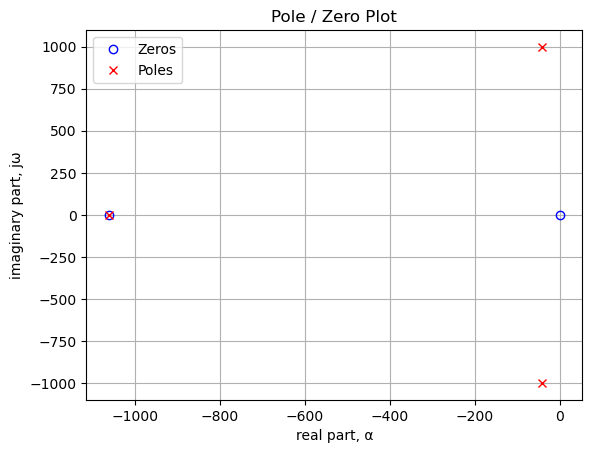

In [72]:
#| echo: true
#| fig-cap: pole zero figure caption

plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob',
    markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The code below generates a table that lists the values of the pole and zero locations. 

In [73]:
#| echo: true
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

Markdown(tabulate(table_row, headers=table_header,
    colalign = ('left','left'), tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1061.03     -1061.03+0.00j
0.00         -42.78+997.93j
             -42.78-997.93j

In [74]:
# printing the table only for display in Jupyter Lab 
print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1061.03     -1061.03+0.00j
0.00         -42.78+997.93j
             -42.78-997.93j


In [75]:
#| echo: false

Markdown('The zero at {:.3f} Hz'.format(sys_zeros[0]/(2*np.pi)) + ' and the pole at {:.3f} Hz cancel.'.format(sys_poles[0]/(2*np.pi)))

The zero at -1061.033 Hz and the pole at -1061.033+0.000j Hz cancel.

### Magnitude and Phase Response
The plot of the filter's magnitude and phase response for the transfer function $H(s)$ is shown below.

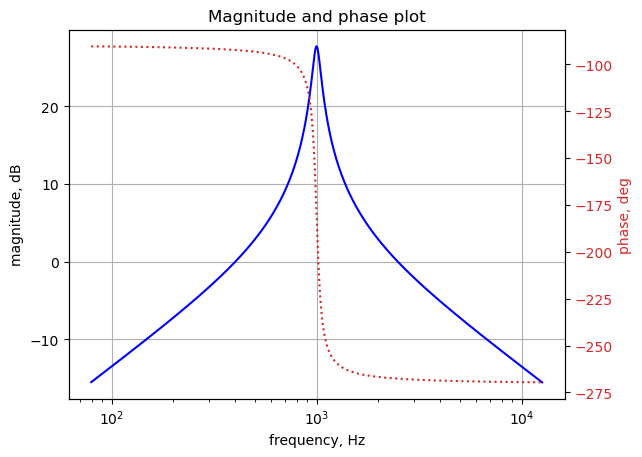

In [76]:
#| echo: true
#| fig-cap: figure caption

x = np.logspace(1.9, 4.1, 1000, endpoint=True)*2*np.pi # x axis data values
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB and
                                         # phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [77]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 27.7 dB at 997.5 Hz and the -3dB frequency is 1044.0 Hz. The attenuation to the right of the peak is 41.3 dB per decade and the filter's quality factor, Q, is 12.32.


The filter Q factor can also be calculated from the element values. 

In [78]:
#| echo: true
Markdown('Calculated Q factor: {:.3f}'.format(N(Q_factor.subs({R:15000,
    R2:186000, C:1e-8, C2:9.1e-10}))))

Calculated Q factor: 11.673

The calculated Q factor is a bit different than the the Q measured from the frequency response plot. 

The envelope of oscillation decays proportional to $e^{−\alpha t}$, where $\alpha$ is the attenuation parameter calculated above.

In [79]:
#| echo: true
alpha = atten_param.subs({R:15000,R2:186000,C:1e-8,C2:9.1e-10})
Markdown('$\\alpha$ = {:.3f}'.format(alpha))

$\alpha$ = 268.817

### Step Response 
The step response of the is calculated using the SciPy function [lsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html), which can be used to simulate output of a continuous-time linear system from the continuous-time linear time invariant system base class. The function lsim allows us to evaluate the performance characteristics of the circuit to square wave input. 

A square wave with a frequency of 25 Hz and an amplitude of one volt peak to peak is used as the input to the filter. The code below generates the plot.

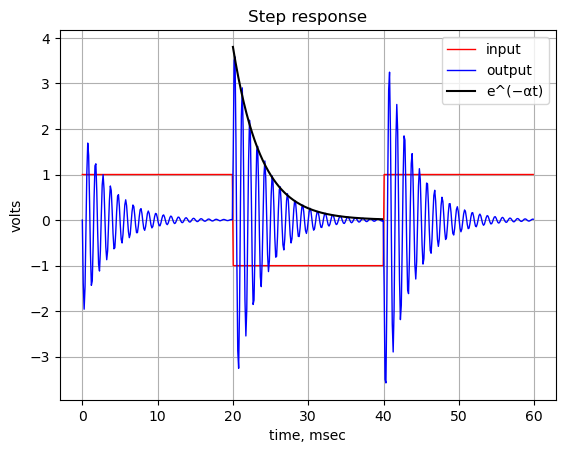

In [80]:
#| echo: true
#| fig-cap: figure caption

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')

plt.plot((t_step[0:166]+0.02)*1e3, 3.8*np.exp(-float(alpha)*t_step[0:166]),
    'k', linewidth = 1.5, label='e^(−αt)')

plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

The filter's response to a square wave input shows a damped oscillation that occurs at each edge of the square wave. The frequency of the oscillation is about 10 cycles over 10 ms, which is 1000 Hz and corresponds to $\omega_n$ = 1kHz. The decay time constant is about 10 ms.

### Group Delay
[Group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#) is a measure of the time delay experienced by a group of frequencies as they pass through a system. It's essentially the rate of change of the phase response with respect to frequency. Group Delay is important for the following reasons: 

- Signal distortion: Variations in group delay across different frequencies can cause signal distortion, affecting the quality of audio, video, and data transmission.
- System design: Understanding group delay is crucial for designing systems with linear phase characteristics, which minimize distortion.
- Pulse propagation: In fields like optics and telecommunications, group delay affects the shape and timing of pulses.

Group delay ($\tau_g$) is calculated as the negative derivative of the phase response ($\phi$) with respect to angular frequency ($\omega$):

$\tau _{g}(\omega )=-\frac  {d\phi (\omega)}{d\omega}$

A system with a constant group delay is called a linear phase system. These systems introduce a pure time delay to all frequency components without altering their relative phase relationships, preserving the original waveform shape. According to [Audibility of Group-Delay Equalization](https://acris.aalto.fi/ws/portalfiles/portal/66449704/Audibility_of_Group_Delay_Equalization.pdf), the threshold is 2 ms. The abstract for the paper states: 

> The audibility thresholds for group-delay variation from several previous related studies are shown in Fig. 1. If not otherwise stated, these studies have been conducted using headphones. Green applied Huffman sequences, or truncated impulse responses of second-order allpass filters, to study the audibility of phase distortion. He found a threshold value for the peak group delay of about 2 ms for center frequencies of 625 Hz, 1875 Hz, and 4062 Hz.

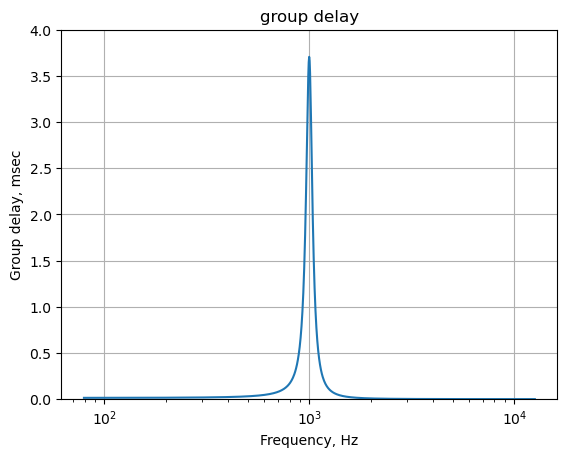

In [81]:
#| echo: true
#| fig-cap: figure caption

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,
    '-',label='group delay')

plt.ylim((0,4))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

## Comparison with LTSpice
The transient and frequency response of the filter were simulated in LTSpice and the results are a close match with the Python results as shown in the plots below.

In [82]:
#| echo: false
fn = 'Bandpass-Twin-T-Active-Filter_td.csv' # time domain data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

# initaliase empty arrays
time = np.zeros(len(LTSpice_data))
voltage1 = np.zeros(len(LTSpice_data))
voltage2 = np.zeros(len(LTSpice_data))

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    time[i] = LTSpice_data[i][0]
    voltage1[i] = LTSpice_data[i][1]
    voltage2[i] = LTSpice_data[i][2]

In [83]:
#| echo: false
fn = 'Bandpass-Twin-T-Active-Filter_fd.csv' # frequency data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# initaliaze empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complex numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

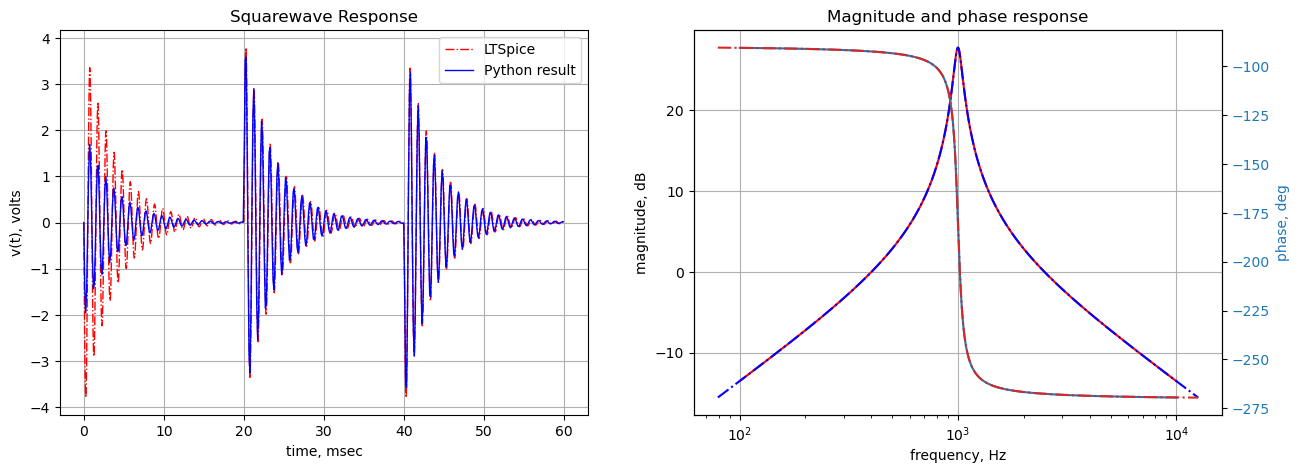

In [84]:
#| echo: false
#| fig-cap: figure caption

plt.subplots(1,2,figsize=(15, 5))

# Plot#1: squarewave response
plt.subplot(1, 2, 1)

# squarewave response
plt.title('Squarewave Response')

plt.plot(time*1e3, voltage2, '-.r', alpha = 1.0, linewidth = 1, label='LTSpice')
plt.plot(t_step*1e3, y_step,'b', alpha = 1.0, linewidth = 1, label='Python result')

plt.ylabel('v(t), volts')
plt.xlabel('time, msec')

plt.legend()
plt.grid()

# Plot#2: frequency response
ax1 = plt.subplot(1, 2, 2)

#fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-.b')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[1:], np.unwrap(np.angle(voltage[1:]))*180/np.pi,'-',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,'-.',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')

# show plot
plt.show()

In the plot on the right, the initial transient is different since the LTSpice input starts with a value -1 and the Python code has the initial value of the square wave equal to zero. Other than that difference, there is a one to one correspondance. 

## Sensitivity Analysis
Circuit sensitivity analysis is an essential step in electronic circuit design. Sensitivity analysis attempts to determine how much a circuit's characteristics change in relation to variations in component values. It helps circuit designers make informed decisions to balance performance and cost. The Jupyter notebook linked [here](https://github.com/Tiburonboy/EE_jupyter_notebooks/blob/main/Buchla%20Twin-T%20Active%20Filter/Twin-T_BPF_Sensitivity_Analysis_v0.ipynb) performs a sensitivity analysis, Monte Carlo simulation and a worst case tolerance analysis on the filter.

## Filter Design Examples
This section will some walk through the design steps to implement and analyze the filter.

### Example 1, where $R_1 = R_3 = R$ and $C_1 = C_3 = C$
In this example, we want to design a filter with a center frequency of 1.4kHz and a filter Q of approximately 3. The filter in Figure 1 is simplified by using $R_1 = R_3 = R$ and $C_1 = C_3 = C$. Usually it's more convenient to pick capacitor values from standard values and solve for resistors. The standard values for resistors and capacitors follow the [E-Series](https://en.wikipedia.org/wiki/E_series_of_preferred_numbers) of numbers. The table below can be used to select values for C and R to put the filter response in the ball park for the desired center frequency.

| Frequency Range | C | R |
|---|---|---|
| 10 to 500 Hz | 1 $\mu$F | 10 k$\Omega$ |
| 500 to 1 kHz | 100 nF | 10 k$\Omega$ |
| 1 to 5 kHz | 10 nF | 10 k$\Omega$ |
| 5 to 10 kHz | 1 nF | 5 k$\Omega$ |

The code below will plot the range of $R_2$, $C_2$ and filter Q for a given center frequency, R and C. Note some of the lines of code were to long to display across the page, so I broke a few of the longer lines at commas and periods in the code to control where the lines are wrapped.

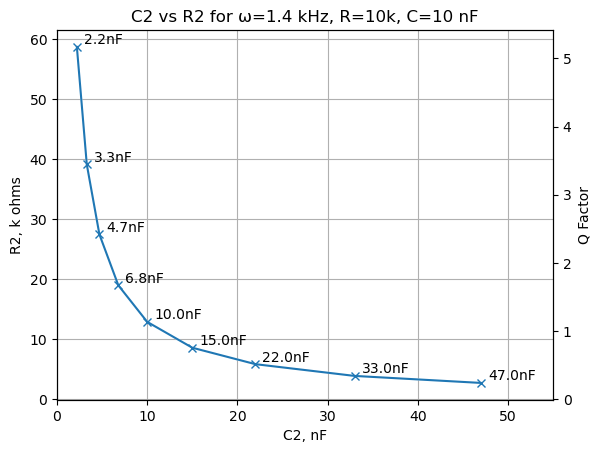

In [85]:
#| echo: true
#| fig-cap: C2 and R2 for frequency and R and C

E6_cap_nF_list = np.array([2.2, 3.3, 4.7, 6.8, 10, 15, 22, 33, 47])*1e-9

C2_plot = E6_cap_nF_list

R2_plot = np.zeros(len(C2_plot))
Q_plot = np.zeros(len(C2_plot))

freq = 1.4 # kHz
C_value = 10e-9
R_value = 10e3

fig, ax1 = plt.subplots()

# solve for R2 for each C2 in the capacitor list
for i in range(len(C2_plot)):
    R2_plot[i] = solve(omega_n.subs({R:R_value, C2:C2_plot[i],
        C:C_value})-2*np.pi*freq*1e3,R2)[0]
    Q_plot[i] = Q_factor.subs({R:R_value, R2:R2_plot[i],
        C:C_value, C2:C2_plot[i]})
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,
        R2_plot[i]/1e3), xytext=(5,2), textcoords='offset points')

ax1.set_ylabel('R2, k ohms')
ax1.set_xlabel('C2, nF')

# set the color to white to hide the plot
plt.plot(C2_plot*1e9,R2_plot/1e3,'x-w')
plt.xlim((0,55))

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

plt.plot(C2_plot*1e9,Q_plot,'x-')

ax2.set_ylabel('Q Factor',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('C2 vs R2 for \u03C9={:.1f} kHz, R={:.0f}k, C={:,.0f} nF'.
    format(freq, R_value/1e3,C_value*1e9))
plt.show()

In the code above the center frequency is set by the assignment: ```freq = 1.4```, which has units of kHz.  The desired Q is about 3, so $C_2=4.7$ nF is chosen.

The plot below shows the filter's peak amplitude versus the value of $C_2$.

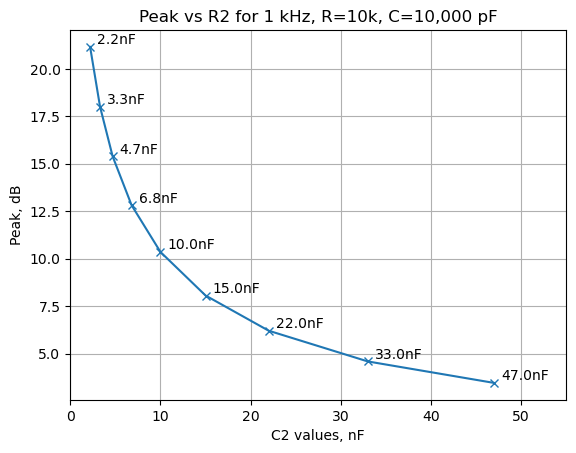

In [86]:
#| echo: false
#| fig-cap: fig cap

peak_plot = np.zeros(len(C2_plot))

for i in range(len(C2_plot)):
    peak_plot[i] = 20*np.log10(float(abs(H_sym_reduced_complexity.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:1j*2*np.pi*freq*1e3}))))
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,peak_plot[i]), xytext=(5,2), textcoords='offset points')

plt.plot(C2_plot*1e9,peak_plot,'x-')
plt.xlim((0,55))

plt.xlabel('C2 values, nF')
plt.ylabel('Peak, dB')
plt.title('Peak vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

We can choose the value of C2, which is $C_2=4.7$nF and solve for $R_2$.

In [87]:
#| echo: true
C2_value = 4.7e-9

R2_value = solve(omega_n.subs({R:R_value, C2:C2_value,
    C:C_value})-2*np.pi*freq*1e3,R2)[0]
Markdown('$R_2={:.3f}k$'.format(R2_value/1e3))

$R_2=27.497k$

The value happens to be very close to a standard value 1% metal film resistor. Setting $R_2$ equal to ```27,500```.

In [88]:
#| echo: true
R2_value = 27500

The plot of the magnitude and phase are shown below.

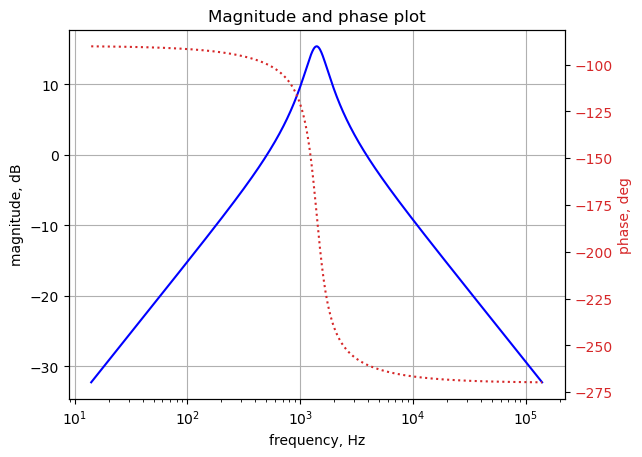

In [89]:
#| echo: false
#| fig-cap: fig cap

num, denom = fraction(H_sym_reduced_complexity.subs({R:R_value, R2:R2_value, C:C_value, C2:C2_value}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

x = np.logspace(np.log10(freq*1e3)-2, np.log10(freq*1e3)+2, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [90]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 15.4 dB at 1393.6 Hz and the -3dB frequency is 1722.7 Hz. The attenuation to the right of the peak is 27.6 dB per decade and the filter's quality factor, Q, is 2.49.


The filter Q factor can also be calculated from the element values. 

In [91]:
#| echo: true
Markdown('Calculated Q factor: {:.3f}'.format(N(Q_factor.subs({R:15000,
    R2:186000, C:1e-8,C2:9.1e-10}))))

Calculated Q factor: 11.673

The square wave responce is shown below.

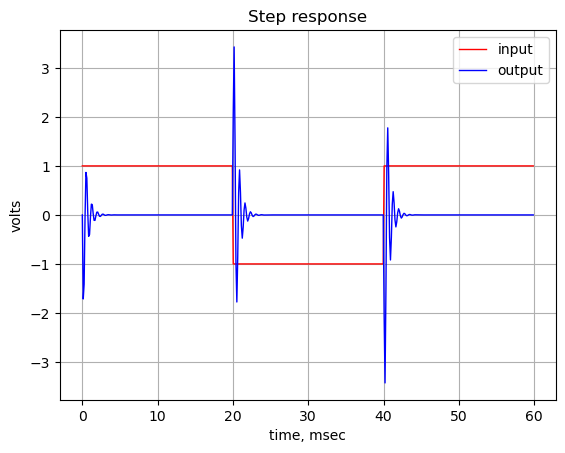

In [92]:
#| echo: false
#| fig-cap: fig cap

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

### Example 2, Design from Pole Locations
In this example given capacitor values and the pole locations, the values of the resistors are obtained with the help of SymPy's solver function. Three variables $p_1$, $p_2$ and $p_3$ are declared, which are the three poles of the charactic polynomial. 

In [93]:
#| echo: false
p1, p2, p3 = symbols('p1 p2 p3') # system poles

I'll write the characteristic polynomial in the form, $(s+p_1)(s+p_2)(s+p_3)$. The code below expands and collects the terms of the equation.

In [94]:
#| echo: true
d_equ = expand((s+p1)*(s+p2)*(s+p3)).collect(s)
Markdown('${:s}$'.format(latex(d_equ)))

$p_{1} p_{2} p_{3} + s^{3} + s^{2} \left(p_{1} + p_{2} + p_{3}\right) + s \left(p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}\right)$

The coefficients of the variable $s$ are:

In [95]:
#| echo: false
d3 = d_equ.coeff(s**3)
d2 = d_equ.coeff(s**2)
d1 = d_equ.coeff(s**1)
d0 = d_equ - d1*s*1 - d2*s**2 - d3*s**3
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=1$</p><p>$d_2=p_{1} + p_{2} + p_{3}$</p><p>    $d_1=p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}$</p><p>$d_0=p_{1} p_{2} p_{3}$</p>

Dividing each term by $d_0$, we get the coefficients in canonical form.

In [96]:
#| echo: false
d3=d3/d0
d2=d2/d0
d1=d1/d0
d0=d0/d0
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=\frac{1}{p_{1} p_{2} p_{3}}$</p><p>$d_2=\frac{p_{1} + p_{2} + p_{3}}{p_{1} p_{2} p_{3}}$</p><p>    $d_1=\frac{p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}}{p_{1} p_{2} p_{3}}$</p><p>$d_0=1$</p>

The coefficients of the filter's characteristic equation were obtained above and are:

In [97]:
#| echo: false
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

The `scipy.signal` module provides a set of functions for designing and analyzing analog filters. The SciPy functions to design classic analog filters are:

- `scipy.signal.buttap`: Butterworth filter
- `scipy.signal.cheb1ap`: Chebyshev type I filter
- `scipy.signal.cheb2ap`: Chebyshev type II filter
- `scipy.signal.besselap`: Bessel filter

These functions return (z,p,k) for an analog prototype filter; the second parameter, p, are the poles of the filter. Commenting out the other filter types, we can use ```cheb2ap``` to calculate the pole locations for this type of filter to use in this example.

In [98]:
#| echo: true
N = 3 # filter order
Wn = 1 # normalised frequency

#filter_param = signal.besselap(N)
#filter_param = signal.buttap(N)
rp = 0.8
rs = 5.0
#filter_param = signal.cheb1ap(N,rp)
filter_param = signal.cheb2ap(N,rs)

The pole locations are tabulated below.

In [99]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Pole #', 'Value, rad/s']
table_row = []
k = 1
for i in filter_param[1]:
    m = '{:d}'.format(k)
    p = '{:.2f}'.format(i)
    table_row.append([m,p])
    k+=1

Markdown(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

Pole #    Value, rad/s
--------  --------------
1         -0.22-1.02j
2         -2.48-0.00j
3         -0.22+1.02j

In [100]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

Pole #    Value, rad/s
--------  --------------
1         -0.22-1.02j
2         -2.48-0.00j
3         -0.22+1.02j


In the code below the normalized values of $C_1$, $C_2$ and $C_3$ were chosen arbitrarily. It might be necessary to adjust these values if the resistor values don't end up being positive real numbers. The poles can be a calculated from SciPy filter functions or chosen to be either three postive real numbers or one positive real number and a pair of complex conjugate numbers. 

The values for the poles are entered into the code as positive numbers since we defined the characteristic polynomial in terms of $(s+p_1)(s+p_2)(s+p_3)$.

In [101]:
#| echo: true
C1_value = 0.7
C2_value = 0.2
C3_value = 0.3
p1_value = -filter_param[1][0]
p2_value = -filter_param[1][1]
p3_value = -filter_param[1][2]

sub_values = {C1:C1_value, C2:C2_value, C3:C3_value, p1:p1_value,
    p2:p2_value, p3:p3_value}

Equating the coefficients of $s$ we get:

$d_1 = a_1$

$d_2 = a_2$

$d_3 = a_3$

In the expanded version of these equation, we see that there are three equations and three unknowns, which are $R_1$, $R_2$ and $R_3$, since the values for the capacitors and poles have been assigned.

$d_3=\frac{1}{p_{1} p_{2} p_{3}} = a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$

$d_2=\frac{p_{1} + p_{2} + p_{3}}{p_{1} p_{2} p_{3}} = a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$

$d_1=\frac{p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}}{p_{1} p_{2} p_{3}} = a_1=C_{2} R_{1} + C_{3} R_{1}$

Using the SymPy function ```solve```, to solve for the resistor values, the solution is:

In [102]:
#| echo: true
sol_values = solve(((d3-a3).subs(sub_values), (d2-a2).subs(sub_values),
    (d1-a1).subs(sub_values)),(R1,R2,R3))
Markdown('${:s}$'.format(latex(sol_values[0])))

$\left( 1.61172938442011, \  0.51227330881633, \  10.6011406578226\right)$

There are two solutions, so we can just arbitrarily chose the first one. Using the second solution means that the value for $R_2$ and $R_3$ are swapped.  

In [103]:
#| echo: true
R1_value = sol_values[0][0]
R2_value = sol_values[0][1]
R3_value = sol_values[0][2]

The values for the resistors and capacitors can be put into the network equations, which are displayed below.

In [104]:
#| echo: false
equ_N_ex2 = NE_sym.subs({R1:R1_value, R2:R2_value, R3:R3_value,
    C1:C1_value, C2:C2_value, C3:C3_value})

# display the equations
temp = ''
for i in range(shape(equ_N_ex2.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N_ex2.rhs[i]),
        latex(round_expr(equ_N_ex2.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 0.7 s v_{5} + v_{1} \cdot \left(0.7 s + 0.620451553\right) - 0.620451553 v_{3}$</p><p>$0 = I_{O1} - 0.3 s v_{3} + v_{2} \cdot \left(0.3 s + 0.094329472\right) - 0.094329472 v_{5}$</p><p>$0 = - 0.3 s v_{2} - 0.2 s v_{4} - 0.620451553 v_{1} + v_{3} \cdot \left(0.5 s + 0.620451553\right)$</p><p>$0 = - 0.2 s v_{3} + v_{4} \cdot \left(0.2 s + 1.952082966\right) - 1.952082966 v_{5}$</p><p>$0 = - 0.7 s v_{1} - 0.094329472 v_{2} - 1.952082966 v_{4} + v_{5} \cdot \left(0.7 s + 2.046412438\right)$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

Solving for voltages and currents in terms of Laplace variable $s$, we get:

In [105]:
#| echo: false
U_ex2 = solve(equ_N_ex2,X)

temp = ''
for i in U_ex2.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_ex2[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- 1.54018451100814 \cdot 10^{44} V_{1} s^{2} - 2.20352198180951 \cdot 10^{44} V_{1} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p><p>$v_{3} = \frac{- 8.19874845657021 \cdot 10^{43} V_{1} s^{2} + 2.28498601678766 \cdot 10^{43} V_{1}}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{8.4 \cdot 10^{42} V_{1} s^{3} - 2.34107469483772 \cdot 10^{42} V_{1} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [106]:
#| echo: false
H_ex2 = (U_ex2[v2]/U_ex2[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_ex2)))

$H(s)=\frac{- 1.54018451100814 \cdot 10^{44} s^{2} - 2.20352198180951 \cdot 10^{44} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$

In [107]:
#| echo: false
H_num_ex2, H_denom_ex2 = fraction(H_ex2) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num_ex2, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom_ex2, s).all_coeffs(), dtype=float)
sys_tf_ex2 = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

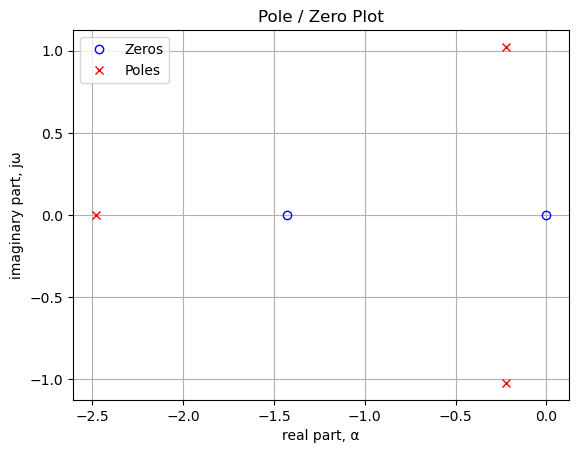

In [108]:
#| echo: false
#| fig-cap: fig cap
sys_zeros_ex2 = np.roots(sys_tf_ex2.num)
sys_poles_ex2 = np.roots(sys_tf_ex2.den)

plt.plot(np.real(sys_zeros_ex2), np.imag(sys_zeros_ex2), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles_ex2), np.imag(sys_poles_ex2), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [109]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros_ex2),len(sys_poles_ex2))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros_ex2[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles_ex2[i])
    else:
        p = ''
    table_row.append([z,p])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-1.43           -2.48+0.00j
0.00            -0.22+1.02j
                -0.22-1.02j

In [110]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-1.43           -2.48+0.00j
0.00            -0.22+1.02j
                -0.22-1.02j


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

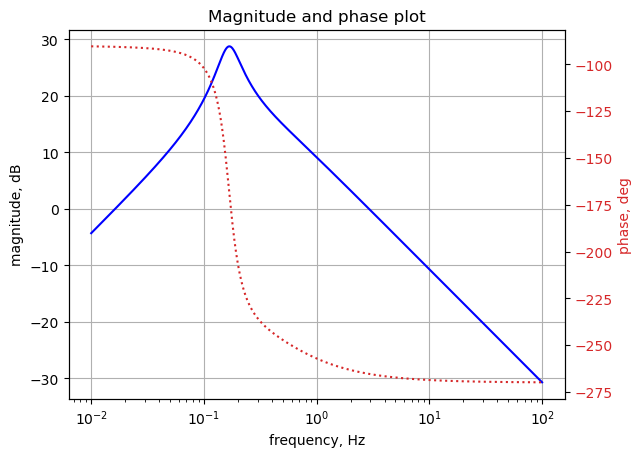

In [111]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(-2, 2, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf_ex2, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [112]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.2f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 28.7 dB at 0.17 Hz and the -3dB frequency is 0.2 Hz. The attenuation to the right of the peak is 24.0 dB per decade and the filter's quality factor, Q, is 2.43.


The step response is plotted below.

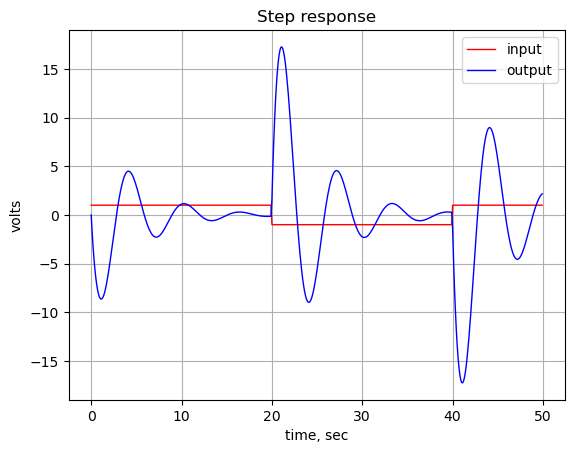

In [113]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf_ex2, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

The values of the resistors and capacitors can be frequency scaled to put the center frequency of the filter at a different location in the frequency domain. 



### Example 3, Time Domain Solution
In this example, the use of SymPy's [inverse Laplace transform](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.inverse_laplace_transform) function is examined. 

Using $U_{sym}[v_2]$ from above to get the the extression for the node 2's voltage.

In [114]:
#| echo: false
t = symbols('t',positive=True)  # t > 0

In [115]:
#| echo: false
U_sym[v2]
Markdown('$v_2(t)={:s}$'.format(latex(U_sym[v2])))

$v_2(t)=\frac{- C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} R_{3} V_{1} s - C_{2} R_{2} V_{1} s - C_{2} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$

Substituing in the values for the components,
```
C2 = 4.7e-9
R2 = 27500
C1 = C3 = 10e-9
R1 = R3 = 10e3
```
and setting $V_1 = \frac {1}{s}$, which is the Laplace function for a unit step, we get:

In [116]:
#| echo: true
v2_ex3_s = U_sym[v2].subs({V1:1/s, R1:10e3, R2:27500, R3:10e3,
    C1:10e-9, C2:4.7e-9, C3:10e-9}).nsimplify().simplify().expand().together()
Markdown('$v_2(s)={:s}$'.format(latex(v2_ex3_s)))

$v_2(s)=- \frac{11050000}{517 s^{2} + 1880000 s + 40000000000}$

The expression for $v_2$ is symplified with the chain of operators applied to the expression; [nsimplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#sympy.simplify.simplify.nsimplify), [simplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#simplify), [expand()](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.expand) and [together()](https://docs.sympy.org/latest/modules/polys/reference.html#sympy.polys.rationaltools.together). This helps SymPy solve the inverse Laplace transform.

The inverse Laplace transform can be calculated with the following code:

In [117]:
#| echo: true
v2_t = inverse_laplace_transform(v2_ex3_s, s, t)

Markdown('$v_2(t)={:s}$'.format(latex(v2_t)))

$v_2(t)=- \frac{85 \sqrt{611} e^{- \frac{20000 t}{11}} \sin{\left(\frac{180000 \sqrt{611} t}{517} \right)}}{846}$

The SymPy inverse Laplace transform seems to only work on simple expressions, like the 2nd order one above. It took SymPy about 20 seconds to solve the inversere on my laptop. 

#### The Inverse Transform, Alternate Method
If we let $R_3=5k$, the expression for $v_2(s)$ does not simplify and the denominator is a 3rd order polynominal.

In [118]:
#| echo: true
v2_ex3_s_alt = U_sym[v2].subs({V1:1/s, R1:10e3, R2:27500, R3:5e3,
    C1:10e-9, C2:4.7e-9, C3:10e-9}).nsimplify().simplify().expand().together()
Markdown('$v_2(s)={:s}$'.format(latex(v2_ex3_s_alt)))

$v_2(s)=\frac{50000 \left(- 221 s - 3244000\right)}{517 s^{3} + 12220000 s^{2} + 117600000000 s + 800000000000000}$

Using SciPy's [residue](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residue.html) function to compute partial-fraction expansion, we get $r$, which corresponds to the residues of the poles and $p$, which are the poles ordered by magnitude in ascending order. These values are tabulated below.

In [119]:
#| echo: true
n, d = fraction(v2_ex3_s_alt)
cn = Poly(n, s).all_coeffs()
cd = Poly(d, s).all_coeffs()
r, p, k = signal.residue(cn, cd, tol=0.001, rtype='avg')

In [120]:
#| echo: false
#| tbl-cap: table residues and poles
table_header = ['residues', 'poles']
table_row = []
k = 1
for i in range(len(r)):
    m = '{:.2f}'.format(r[i])
    n = '{:.2f}'.format(p[i])
    table_row.append([m,n])
    k+=1

Markdown(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

residues     poles
-----------  -----------------
-0.04+1.12j  -4123.53+9140.36j
-0.04-1.12j  -4123.53-9140.36j
0.07+0.00j   -15389.30+0.00j

In [121]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

residues     poles
-----------  -----------------
-0.04+1.12j  -4123.53+9140.36j
-0.04-1.12j  -4123.53-9140.36j
0.07+0.00j   -15389.30+0.00j


The following code builds a symbolic expression for each of the residues and finds the inverse Laplace of each one and appends the espression to the result from the other poles. 

In [122]:
#| echo: true
v2_ex3_alt = 0
for i in range(len(r)):
    m = (r[i]/(s-p[i]))
    v2_ex3_alt += inverse_laplace_transform(m, s, t)

Markdown('$v_2(t)={:s}$'.format(latex(round_expr(v2_ex3_alt,3))))

$v_2(t)=- \left(0.036 + 1.125 i\right) e^{- 4123.53 t - 9140.357 i t} - \left(0.036 - 1.125 i\right) e^{- 4123.53 t + 9140.357 i t} + 0.072 e^{- 15389.303 t}$

The expression for the inverse Laplace transform does look a bit unusual, but I think it's correct. We can use the SymPy function [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) to transform the SymPy expressions to a lambda function which can be used to calculate the numerical values.

In [123]:
#| echo: true
x = np.linspace(0, 0.002, 200, endpoint=True)
v2_alt = np.zeros(len(x),dtype = complex)

v2_alt = lambdify(t, v2_ex3_alt)(x)

The plot of the inverse transform is shown below.

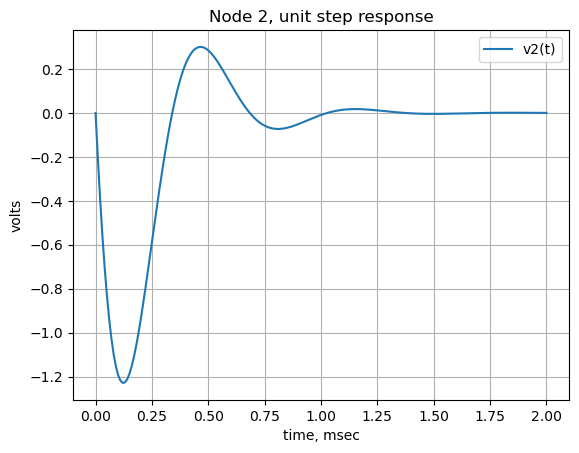

In [124]:
#| echo: false
#| fig-cap: figure caption

plt.title('Node 2, unit step response')

plt.plot(x*1000, np.real(v2_alt),label='v2(t)')

plt.ylabel('volts')
plt.xlabel('time, msec')

plt.legend()
plt.grid()
plt.show()

### Example 5, HP, LP, BR and All Pass Variations
With some modification to the topology of Figure 1, the band pass filter circuit can be transformed into a high pass, low pass, band reject or an all pass filter. These filters are described in the Jupyter notebook linked [here](https://github.com/Tiburonboy/EE_jupyter_notebooks/blob/main/Buchla%20Twin-T%20Active%20Filter/Twin-T_variations_v0.ipynb).

<!--
# DISCUSSION - What does it mean?
Here, you interpret the data, explain the implications, acknowledge limitations, and make recommendations for future research. The discussion allows you to show the greater meaning of your study.

Interpret the Findings: Analyze the results in the context of your initial hypothesis and prior studies:

- How do your findings compare to past research? Are they consistent or contradictory?
- What conclusions can you draw from the data?
- What theories or mechanisms could explain the outcomes?

Discuss the Implications: Address the impact and applications of the research:

- How do the findings advance scientific understanding or technical capability?
- Can the results improve processes, design, or policies in related fields?
- What innovations or new research directions do they enable?

Identify Limitations and Future Directions: No study is perfect, so discuss potential weaknesses and areas for improvement:

- Were there any methodological limitations that could influence the results?
- Can the research be expanded by testing new variables or conditions?
- How could future studies build on your work? What questions remain unanswered?
-->

# DISCUSSION
Network equations for the filter were generated by the MNA procedure and solved symbolically. The resulting analyic expressions were rather long and didn't provide any insight into the circuit's operation. Symbolic soultions for the filter's poles and zeros also were not very insightful. After simplifing the filter by letting $R_1=R_3$ and $C_1=C_3$, the filter's chararteristic polynomial reduced to a second order polynominial. Then the traditional expresions for natural frequency and quality factor could be related to component values. A concept call Design Orientated Analysis was breifyly mentioned and additional calculations are contained in a linked notebook.

The main advantage of the filter is that it uses only one Op Amp, where as the more traditional active BPF filters typically use two Op Amps. The amplitude response of the filter can't independently be controled. This means than when depolying the filter in an equalizer circuit, variable resistors or voltage dividers are needed to set the relative peak gain for each band. The sensitivity of the filter was calculated in a linked JupyterLab notebook, but the relative sensitivity was not compared to other active BPF's. This report could be used as a template to analyize the Salen Key, State Variable, BiQuadratic and Dual Amplifier Bandpass filter topologies.

The validity of the Python based analysis was checked with LTSpice and there is was a one to one correspondance.

In [1], there was a references to two prior works that examined the Twin-T topology in a bandpass configuration that could possibly implement a lead-lag network. This idea was explored a bit in example 5, where an all-pass topology was implemented with the help of a second Op Amp. The location of the poles and zeros didn't end up being symetrical about the orgion of the complex frequency plane.    

With some minor adjustments to the filter's component arangement, lowpass, highpass and band reject filters can be implemented. This idea was explored in example 5. This feature might be useful in that a common PCB layout could be used to instantiate various types of filter by including jumpers and exta pads to accomadate either resistors or capacitors in the circuit's branches. 

<!--
# CONCLUSION
But there is no C in IRMD  
The conclusion recaps the significance of your study and key takeaways. Like the abstract, many readers may only read your opening and closing, so ensure the conclusion packs a punch.

Elements to cover:

- Restate the research problem and objectives
- Summarize the major findings and main points
- Emphasize broader implications and applications

The conclusion provides the perfect opportunity to drive home the importance of your work. End on a high note that resonates with readers.
-->
## Conclusion
The filter’s transfer function naturally has two zeros and three poles which can be reduced to a second order characteristic polynomial when $R_1 = R_3$ and $C_1 = C_3$. The simplified case was analyzed with symbolic coefficients. Analytical expressions were derived for network equations. SymPy was used to solve for the node voltages along with obtaining equations for the poles and zeros. The expressions for the poles in symbolic form are rather long and do not provide much insight into the operation of the filter. 

This report has shown that with the help of Python and SymPy, electric LTI circuits can be easily analyzed using a mixture of symbolic and numerical methods when following the template presented in this report. A JupyterLab notebook can be used as the “source code” for publishing reports or documents with the help of Quarto. 

Obtaining analytic expressions for this filter do not appear to be that useful, but are easily obtained with the Python code presented in this report. Most scholarly publications include some analytic expressions and the code presented here can easily generate some of those expressions.

The use of JupyterLab, Python and Quarto provide a convenient work flow for analyzing electric circuits and presenting the results in a PDF. However, if particular formatting is required, as for example many journal publications require, additional work would be required. Some online advice is only to use the JupyterLab notebook and Quarto for first and second drafts and then to export the report material to LaTex for publication.

# References {.unnumbered}
[1] Aaron D. Lanterman, "A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer", https://arxiv.org/abs/2411.11358, last accessed Jan 20, 2025.  
[2] C. Ho and A. Ruehli and P. Brennan, "The modified nodal approach to network analysis", IEEE Transactions on Circuits and Systems, 1975  
[3] M. Hayes, Lcapy: symbolic linear circuit analysis with Python, PeerJ. Computer science, 2022, https://doi.org/10.7717/peerj-cs.875  
[4] Buchla Electronic Musical Instruments, Schematic, 10 Chan. Comb Filter Model 295(A), http://fluxmonkey.com/historicBuchla/295-10chanfilt.htm, last accessed Feburary, 24, 2025  
[5] Symbolic Modified Nodal Analysis using Python, https://tiburonboy.github.io/Symbolic-Modified-Nodal-Analysis-using-Python/, last accessed Feburary, 24, 2025  
[6] O. Palusinski, Automatic Formulation of Circuit Equations,  
https://www2.engr.arizona.edu/~ece570/session3.pdf, last accessed January 11, 2024  
[7] R. D. Middlebrook, Low-entropy expressions: the key to design-oriented analysis, Proceedings Frontiers in Education Twenty-First Annual Conference. Engineering Education in a New World Order, 1991  
[8] Vatché Vorpérian, Fast Analytical Techniques for Electrical and Electronic Circuits, Cambridge University Press, 2002 

# License {.unnumbered}
This work (includes python code, documentation, test circuits, etc.) is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).  

- Share — Copy and redistribute the material in any medium or format.
- Adapt — Remix, transform, and build upon the material for any purpose, even commercially.
- Attribution — You must give [appropriate credit](https://creativecommons.org/licenses/by-sa/4.0/#ref-appropriate-credit), provide a link to the license, and [indicate if changes were made](https://creativecommons.org/licenses/by-sa/4.0/#ref-indicate-changes). You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
- ShareAlike — If you remix, transform, or build upon the material, you must distribute your contributions under the [same license](https://creativecommons.org/licenses/by-sa/4.0/#ref-same-license) as the original.

![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)